In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import ttest_ind

In [68]:
data = pd.read_csv("gene_expression - Sheet1.csv")
df = pd.DataFrame(data)
print(df)

  GeneID  Sample1  Sample2  Sample3  Sample4
0  GeneA      5.3      4.8      5.1      6.0
1  GeneB      2.1      1.9      2.3      2.5
2  GeneC      7.8      8.1      7.5      8.0
3  GeneD      3.6      3.7      3.4      3.8
4  GeneE     10.2      9.5     10.1     10.4
5  GeneF      6.1      5.9      6.3      6.2
6  GeneG      4.5      4.2      4.6      4.7
7  GeneH     12.4     11.9     12.3     12.5
8  GeneI      0.9      1.1      0.8      1.0
9  GeneJ      5.7      5.6      5.8      5.9


In [69]:

print('/n Statsical distribution of the data')
print(df.describe())

/n Statsical distribution of the data
         Sample1    Sample2    Sample3    Sample4
count  10.000000  10.000000  10.000000  10.000000
mean    5.860000   5.670000   5.820000   6.100000
std     3.519217   3.355609   3.477164   3.485526
min     0.900000   1.100000   0.800000   1.000000
25%     3.825000   3.825000   3.700000   4.025000
50%     5.500000   5.200000   5.450000   5.950000
75%     7.375000   7.550000   7.200000   7.550000
max    12.400000  11.900000  12.300000  12.500000


In [70]:
print('/n The missing values are ')
print(df.isnull().sum())

/n The missing values are 
GeneID     0
Sample1    0
Sample2    0
Sample3    0
Sample4    0
dtype: int64


In [71]:
df['Fold_Change'] = df['Sample1'] / df['Sample2']

# Identify the top 5 genes with the highest fold change
top_5_genes = df.sort_values('Fold_Change', ascending=False).head(5)    #Ascending gives the highest value 

# Display the results
print("Top 5 genes with the highest fold change:")
print(top_5_genes)

Top 5 genes with the highest fold change:
  GeneID  Sample1  Sample2  Sample3  Sample4  Fold_Change
1  GeneB      2.1      1.9      2.3      2.5     1.105263
0  GeneA      5.3      4.8      5.1      6.0     1.104167
4  GeneE     10.2      9.5     10.1     10.4     1.073684
6  GeneG      4.5      4.2      4.6      4.7     1.071429
7  GeneH     12.4     11.9     12.3     12.5     1.042017


In [86]:
df['Fold_Change'] = df['Sample1'] / df['Sample2']
print(df)

  GeneID  Sample1  Sample2  Sample3  Sample4  Fold_Change
0  GeneA      5.3      4.8      5.1      6.0     1.104167
1  GeneB      2.1      1.9      2.3      2.5     1.105263
2  GeneC      7.8      8.1      7.5      8.0     0.962963
3  GeneD      3.6      3.7      3.4      3.8     0.972973
4  GeneE     10.2      9.5     10.1     10.4     1.073684
5  GeneF      6.1      5.9      6.3      6.2     1.033898
6  GeneG      4.5      4.2      4.6      4.7     1.071429
7  GeneH     12.4     11.9     12.3     12.5     1.042017
8  GeneI      0.9      1.1      0.8      1.0     0.818182
9  GeneJ      5.7      5.6      5.8      5.9     1.017857


In [87]:
top_5_genes = df.sort_values('Fold_Change', ascending=False ).head(5)
print(top_5_genes)

  GeneID  Sample1  Sample2  Sample3  Sample4  Fold_Change
1  GeneB      2.1      1.9      2.3      2.5     1.105263
0  GeneA      5.3      4.8      5.1      6.0     1.104167
4  GeneE     10.2      9.5     10.1     10.4     1.073684
6  GeneG      4.5      4.2      4.6      4.7     1.071429
7  GeneH     12.4     11.9     12.3     12.5     1.042017


In [88]:
df['Fixed'] = "Fixed"

print(df)

  GeneID  Sample1  Sample2  Sample3  Sample4  Fold_Change  Fixed
0  GeneA      5.3      4.8      5.1      6.0     1.104167  Fixed
1  GeneB      2.1      1.9      2.3      2.5     1.105263  Fixed
2  GeneC      7.8      8.1      7.5      8.0     0.962963  Fixed
3  GeneD      3.6      3.7      3.4      3.8     0.972973  Fixed
4  GeneE     10.2      9.5     10.1     10.4     1.073684  Fixed
5  GeneF      6.1      5.9      6.3      6.2     1.033898  Fixed
6  GeneG      4.5      4.2      4.6      4.7     1.071429  Fixed
7  GeneH     12.4     11.9     12.3     12.5     1.042017  Fixed
8  GeneI      0.9      1.1      0.8      1.0     0.818182  Fixed
9  GeneJ      5.7      5.6      5.8      5.9     1.017857  Fixed


In [89]:
del df['Fixed']


In [90]:
df

,GeneID,Sample1,Sample2,Sample3,Sample4,Fold_Change
0,GeneA,5.3,4.8,5.1,6.0,1.104167
1,GeneB,2.1,1.9,2.3,2.5,1.105263
2,GeneC,7.8,8.1,7.5,8.0,0.962963
3,GeneD,3.6,3.7,3.4,3.8,0.972973
4,GeneE,10.2,9.5,10.1,10.4,1.073684
5,GeneF,6.1,5.9,6.3,6.2,1.033898
6,GeneG,4.5,4.2,4.6,4.7,1.071429
7,GeneH,12.4,11.9,12.3,12.5,1.042017
8,GeneI,0.9,1.1,0.8,1.0,0.818182
9,GeneJ,5.7,5.6,5.8,5.9,1.017857


In [91]:
threshold = df.iloc[:, 1:5].mean().mean()  # Mean of all sample values

# Filter rows where all sample values are below the threshold
filtered_df = df[df.iloc[:, 1:5].lt(threshold).all(axis=1)]

# Display results
print(f"Threshold: {threshold}")
print("Genes with expression values below the threshold in all samples:")
print(filtered_df)

Threshold: 5.862500000000001
Genes with expression values below the threshold in all samples:
  GeneID  Sample1  Sample2  Sample3  Sample4  Fold_Change
1  GeneB      2.1      1.9      2.3      2.5     1.105263
3  GeneD      3.6      3.7      3.4      3.8     0.972973
6  GeneG      4.5      4.2      4.6      4.7     1.071429
8  GeneI      0.9      1.1      0.8      1.0     0.818182


In [92]:
threshold = df.iloc[:, 1:5].mean().mean()  # Mean of all sample values
print(threshold)

5.862500000000001


In [93]:
t = df.iloc[:, 1:5].mean().mean()
print(t)

5.862500000000001


In [94]:
threshold = df.iloc[:, 1:5]
print(threshold)

   Sample1  Sample2  Sample3  Sample4
0      5.3      4.8      5.1      6.0
1      2.1      1.9      2.3      2.5
2      7.8      8.1      7.5      8.0
3      3.6      3.7      3.4      3.8
4     10.2      9.5     10.1     10.4
5      6.1      5.9      6.3      6.2
6      4.5      4.2      4.6      4.7
7     12.4     11.9     12.3     12.5
8      0.9      1.1      0.8      1.0
9      5.7      5.6      5.8      5.9


In [95]:
threshold = df.iloc[:, 1:5].mean()
print(threshold)

Sample1    5.86
Sample2    5.67
Sample3    5.82
Sample4    6.10
dtype: float64


In [96]:
threshold = df.iloc[:, 1:5].mean().mean()
print(threshold)   #threshold is nothing but the mean of the sample expression data 

5.862500000000001


In [97]:
filtered_df = df[df.iloc[:, 1:5].lt(threshold).all(axis=1)]
print(filtered_df)

  GeneID  Sample1  Sample2  Sample3  Sample4  Fold_Change
1  GeneB      2.1      1.9      2.3      2.5     1.105263
3  GeneD      3.6      3.7      3.4      3.8     0.972973
6  GeneG      4.5      4.2      4.6      4.7     1.071429
8  GeneI      0.9      1.1      0.8      1.0     0.818182


In [98]:
threshold = 10

# Filter rows where all sample values are greater than 10
filtered_df = df[df.iloc[:, 1:5].gt(threshold).all(axis=1)]

# Display results
print(f"Genes with expression values greater than {threshold} in all samples:")
print(filtered_df)

Genes with expression values greater than 10 in all samples:
  GeneID  Sample1  Sample2  Sample3  Sample4  Fold_Change
7  GeneH     12.4     11.9     12.3     12.5     1.042017


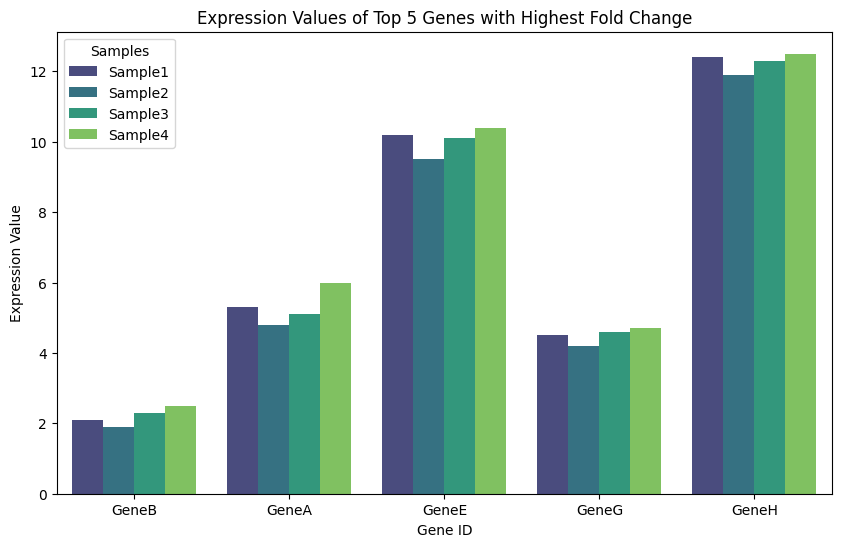

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_genes.melt(id_vars='GeneID', value_vars=['Sample1', 'Sample2', 'Sample3', 'Sample4']),
            x='GeneID', y='value', hue='variable', palette='viridis')

# Customizing the plot
plt.title('Expression Values of Top 5 Genes with Highest Fold Change')
plt.xlabel('Gene ID')
plt.ylabel('Expression Value')
plt.legend(title='Samples', loc='upper left')

# Display the plot
plt.show()

In [100]:
melted= top_5_genes.melt(id_vars='GeneID', value_vars=['Sample1', 'Sample2', 'Sample3', 'Sample4']

SyntaxError: incomplete input (3603544338.py, line 1)